In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [21]:
df = pd.read_csv('cleaned_dataset.csv')
df.head()

,bathroomcount,bedroomcount,constructionyear,country,district,fireplace,floodingzone,furnished,garden,kitchen,livingarea,locality,monthlycharges,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,typeofsale
0,1,1,1969,Belgium,Brugge,0,NON_FLOOD_ZONE,0,0,1,29.0,Zeebrugge,0.0,2,B,8380,99000,10957010,West Flanders,Flanders,1,0,4,flat_studio,203,0,1,1,2,residential_sale
1,6,13,1920,Belgium,Tournai,0,NON_FLOOD_ZONE,0,0,2,391.0,Tournai,0.0,3,D,7500,765000,10956841,Hainaut,Wallonie,31,1,4,apartment_block,130,0,0,5,1,residential_sale
2,2,4,2008,Belgium,Brugge,0,NON_FLOOD_ZONE,1,0,1,111.0,BLANKENBERGE,0.0,2,B,8370,399000,10956807,West Flanders,Flanders,3,0,4,house,0,0,0,2,1,residential_sale
3,1,4,1979,Belgium,Veurne,0,NON_FLOOD_ZONE,0,1,1,113.6,De Panne,0.0,2,F,8660,230000,10956664,West Flanders,Flanders,9,1,2,house,170,0,1,2,1,residential_sale
4,0,2,1972,Belgium,Hasselt,0,NON_FLOOD_ZONE,0,0,1,92.0,Hasselt,0.0,2,B,3500,198000,10956668,Limburg,Flanders,1,0,5,apartment,400,0,1,1,2,residential_sale


In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [27]:
df.head()

,bathroomcount,bedroomcount,constructionyear,country,district,fireplace,floodingzone,furnished,garden,kitchen,livingarea,locality,monthlycharges,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,typeofsale
0,1,1,1969,Belgium,Brugge,0,NON_FLOOD_ZONE,0,0,1,29.0,Zeebrugge,0.0,2,B,8380,99000,10957010,West Flanders,Flanders,1,0,4,flat_studio,203,0,1,1,2,residential_sale
1,6,13,1920,Belgium,Tournai,0,NON_FLOOD_ZONE,0,0,2,391.0,Tournai,0.0,3,D,7500,765000,10956841,Hainaut,Wallonie,31,1,4,apartment_block,130,0,0,5,1,residential_sale
2,2,4,2008,Belgium,Brugge,0,NON_FLOOD_ZONE,1,0,1,111.0,BLANKENBERGE,0.0,2,B,8370,399000,10956807,West Flanders,Flanders,3,0,4,house,0,0,0,2,1,residential_sale
3,1,4,1979,Belgium,Veurne,0,NON_FLOOD_ZONE,0,1,1,113.6,De Panne,0.0,2,F,8660,230000,10956664,West Flanders,Flanders,9,1,2,house,170,0,1,2,1,residential_sale
4,0,2,1972,Belgium,Hasselt,0,NON_FLOOD_ZONE,0,0,1,92.0,Hasselt,0.0,2,B,3500,198000,10956668,Limburg,Flanders,1,0,5,apartment,400,0,1,1,2,residential_sale


In [28]:
df.shape

(94891, 30)

# **CHARTS**

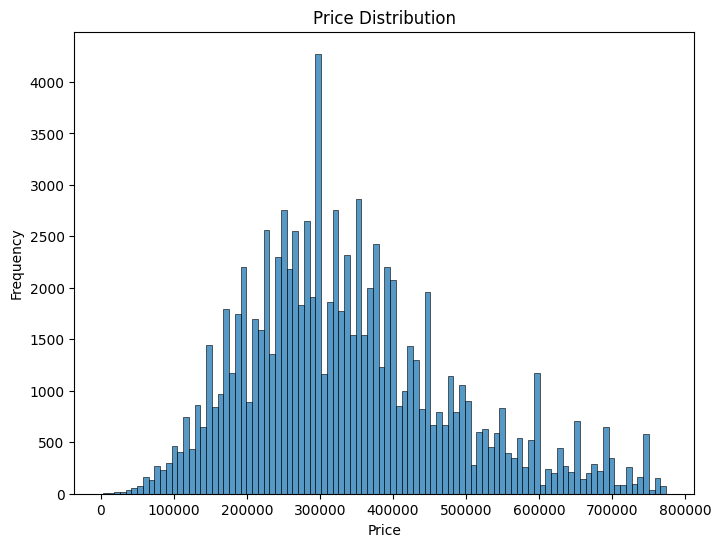

In [30]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.histplot(df.price, kde = False, ax = ax)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [31]:
df.price.describe()

count     94891.000000
mean     340274.627710
std      142804.815854
min        2500.000000
25%      239000.000000
50%      320000.000000
75%      419000.000000
max      773850.000000
Name: price, dtype: float64

In [33]:
df.dtypes

bathroomcount          int64
bedroomcount           int64
constructionyear       int64
country               object
district              object
fireplace              int64
floodingzone          object
furnished              int64
garden                 int64
kitchen                int64
livingarea           float64
locality              object
monthlycharges       float64
numberoffacades        int64
peb                   object
postalcode             int64
price                  int64
propertyid             int64
province              object
region                object
roomcount              int64
showercount            int64
stateofbuilding        int64
subtypeofproperty     object
surfaceofplot          int64
swimmingpool           int64
terrace                int64
toiletcount            int64
typeofproperty         int64
typeofsale            object
dtype: object

# **Numeric Feature**

Text(0.5, 1.0, 'Numeric Feature Heatmap')

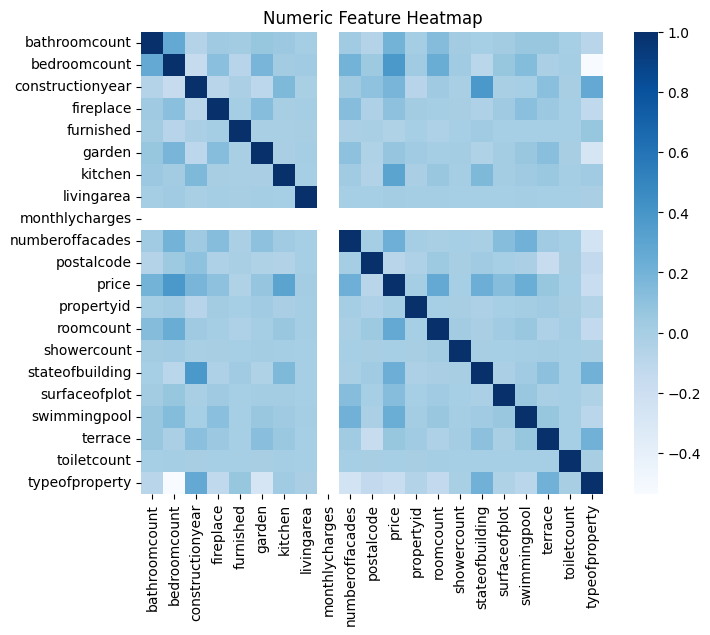

In [34]:
fig, ax = plt.subplots(figsize = (8, 6))
correlation = df.select_dtypes(include = ['float64', 'int64', 'int32']).corr()
sns.heatmap(correlation, ax = ax, vmax = 1, square = True, cmap='Blues')
plt.title('Numeric Feature Heatmap')

# **Correlation**

In [35]:
num = df.select_dtypes(exclude = 'object')
corr_num = num.corr()


correlation = corr_num['price'].sort_values(ascending = False).to_frame()

correlation


,price
price,1.000000
bedroomcount,0.377297
kitchen,0.299656
roomcount,0.268313
swimmingpool,0.236449
stateofbuilding,0.228995
numberoffacades,0.225207
bathroomcount,0.197276
constructionyear,0.179481
surfaceofplot,0.128378


# **PROVINCES vs AVG PRICES** 

In [36]:
avg_price_province = df.groupby('province')['price'].mean().reset_index()
avg_price_province.head()

,province,price
0,Antwerp,361971.625286
1,Brussels,373634.954188
2,East Flanders,354442.680724
3,Flemish Brabant,401948.607226
4,Hainaut,245284.868395


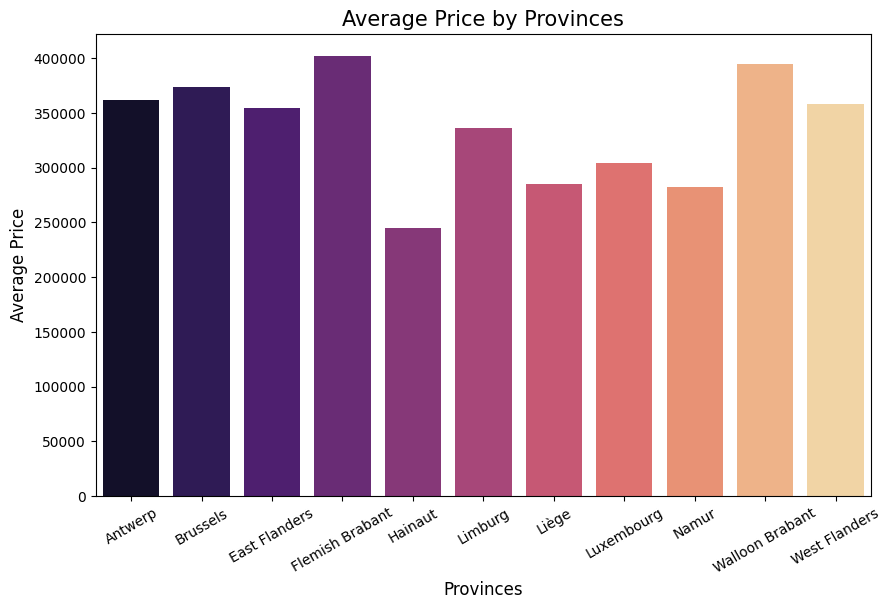

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(data = avg_price_province, y ="price", x ="province", hue = 'province', palette='magma')
plt.xticks(rotation=30)
plt.xlabel('Provinces',  fontsize = 12)
plt.ylabel('Average Price',  fontsize = 12)
plt.title('Average Price by Provinces',  fontsize = 15)
plt.show()

# **DECADES vs AVG PRICES** 

In [ ]:
def year_to_decade(year):
    return (year // 10) * 10

df['decade'] = df['constructionyear'].apply(year_to_decade)

In [ ]:
decades = df.groupby('decade')['price'].mean().reset_index()

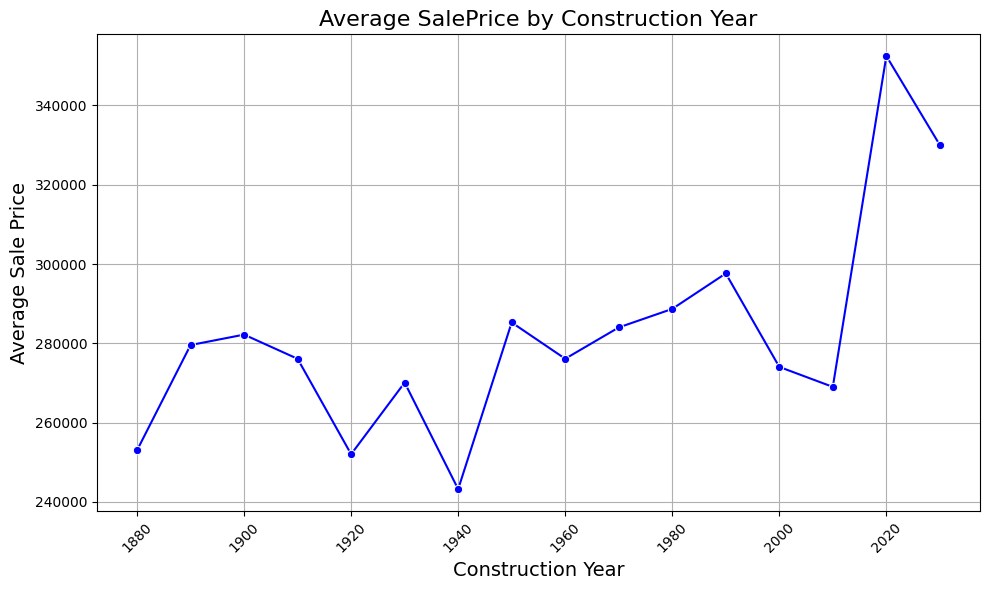

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=decades, x='decade', y='price', marker='o', color='b')

plt.title('Average SalePrice by Construction Year', fontsize=16)
plt.xlabel('Construction Year', fontsize=14)
plt.ylabel('Average Sale Price', fontsize=14)
plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  

plt.show()

In [ ]:
df['decade'].value_counts().sort_index().reset_index()

,decade,count
0,1880,179
1,1890,726
2,1900,1150
3,1910,1804
4,1920,1999
5,1930,5161
6,1940,3770
7,1950,6461
8,1960,9655
9,1970,9987


In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='decade', y='price', marker='o', color='b')

plt.title('Average SalePrice by Construction Year', fontsize=16)
plt.xlabel('Construction Year', fontsize=14)
plt.ylabel('Average Sale Price', fontsize=14)
plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  

plt.show()

# **Bedroom Count VS Price**

In [ ]:
bedr_mean = df.groupby('bedroomcount')['price'].mean().reset_index()
bedr_mean

,bedroomcount,price
0,0,213559.43
1,1,179590.93
2,2,263001.81
3,3,347496.31
4,4,379430.55
5,5,407495.68
6,6,413873.91
7,7,440870.94
8,8,459643.86
9,9,454807.73


<Axes: xlabel='bedroomcount', ylabel='price'>

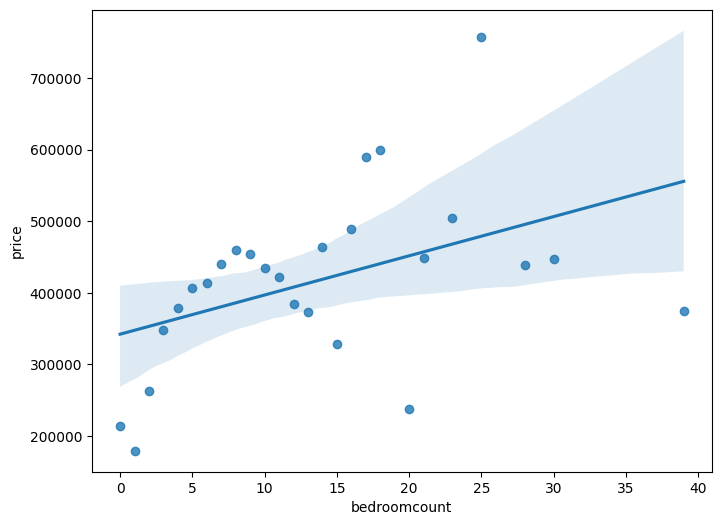

In [ ]:


fig,ax = plt.subplots(figsize=(8,6))
sns.regplot(x = 'bedroomcount', y='price' , data=bedr_mean, ax=ax)

In [ ]:
liv_area = df.groupby('livingarea')['price'].mean().reset_index()
liv_area.head()

,livingarea,price
0,9.00,340.00
1,10.00,350.00
2,11.00,90.00
3,12.00,37937.78
4,13.00,80461.11


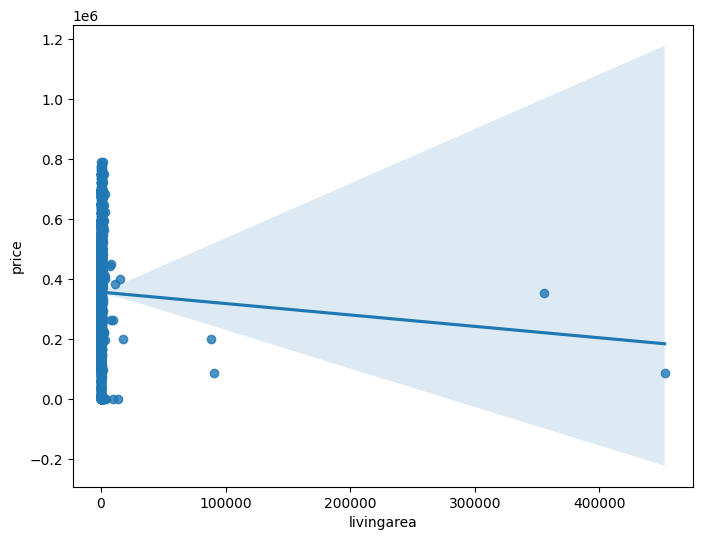

In [ ]:
liv_area = df.groupby('livingarea')['price'].mean().reset_index()

fig,ax = plt.subplots(figsize=(8,6))
sns.regplot(x = 'livingarea', y='price', data=liv_area, ax=ax);

In [ ]:
state = df.groupby('stateofbuilding')['price'].mean().reset_index()
state.head()

,stateofbuilding,price
0,0,321888.25
1,1,290779.49
2,2,275095.07
3,3,262330.60
4,4,283124.43


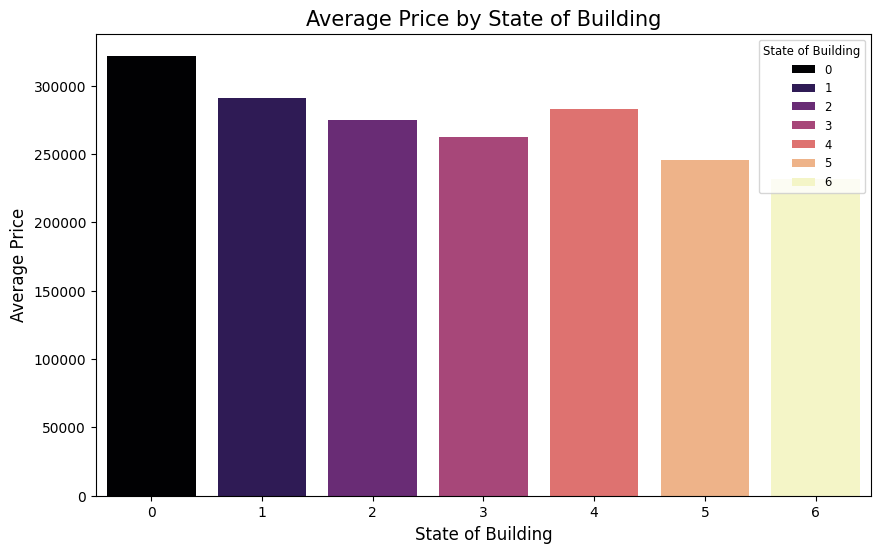

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data = state, y="price", x="stateofbuilding",hue = 'stateofbuilding', palette='magma');
plt.legend(loc='upper right', title='State of Building', fontsize='small', title_fontsize='small')
# plt.xticks(rotation=30)
plt.xlabel('State of Building',  fontsize = 12)
plt.ylabel('Average Price', fontsize = 12)
plt.title('Average Price by State of Building',  fontsize = 15)
plt.show()

C:\Users\mehme\AppData\Local\Temp\ipykernel_45832\364553876.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2,1].set_xticklabels(avg_price_province['province'], rotation = 70, fontsize = 10)


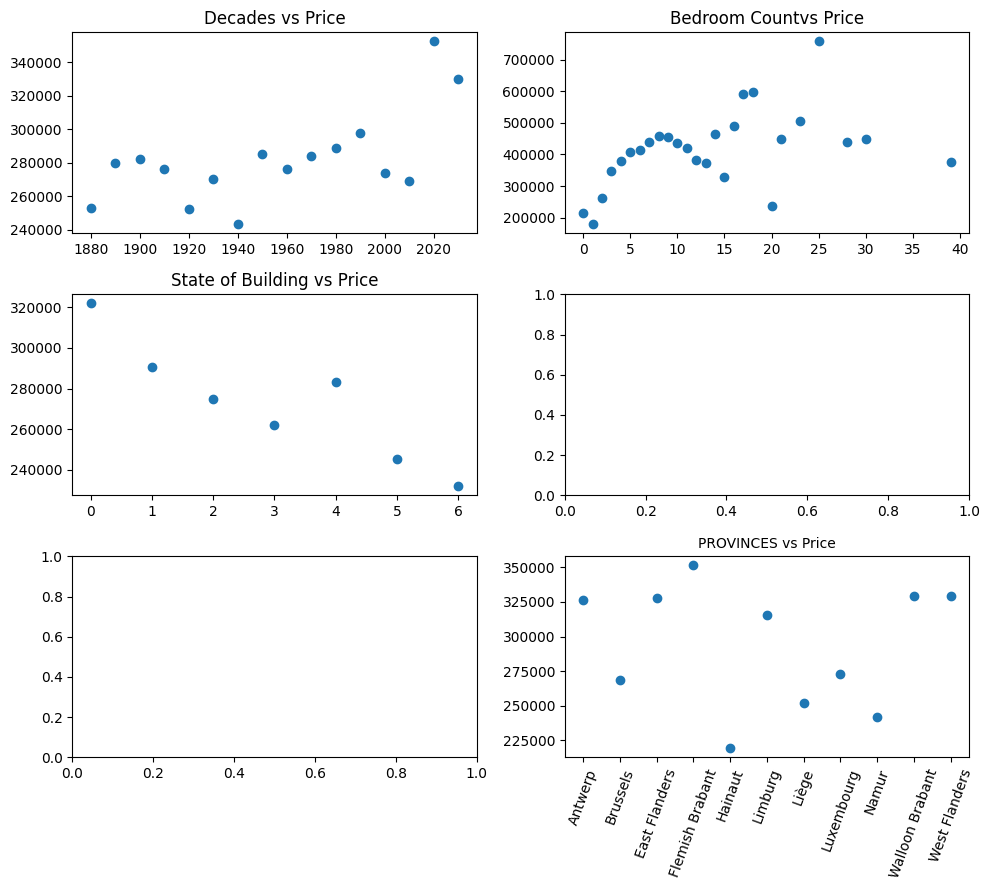

In [ ]:
fig, ax = plt.subplots(3, 2, figsize = (10, 9))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)




ax[2,1].scatter(avg_price_province['province'], avg_price_province['price'])
ax[2,1].set_title('PROVINCES vs Price', fontsize = 10)
ax[2,1].set_xticklabels(avg_price_province['province'], rotation = 70, fontsize = 10)

ax[0,0].scatter(decades['decade'], decades['price'])
ax[0,0].set_title('Decades vs Price')
ax[0,1].scatter(bedr_mean['bedroomcount'], bedr_mean['price'])
ax[0,1].set_title('Bedroom Countvs Price')


ax[1,0].scatter(state['stateofbuilding'], state['price'])
ax[1,0].set_title('State of Building vs Price')
plt.tight_layout()


# ax[1,1].scatter(df['bathroomcount'], property_prices)
# ax[1,1].set_title('Bathroom Count vs Price')
# ax[2,0].scatter(df['numberoffacades'], property_prices)
# ax[2,0].set_title('Number of Facades vs Price')
# ax[2,1].scatter(df['roomcount'], property_prices)
# ax[2,1].set_title('Room Count vs Price')
# plt.tight_layout()



In [ ]:
df.region.value_counts()

region
Flanders    63735
Wallonie    33035
Brussels    12345
Name: count, dtype: int64

Text(0.5, 1.0, 'Region vs Price')

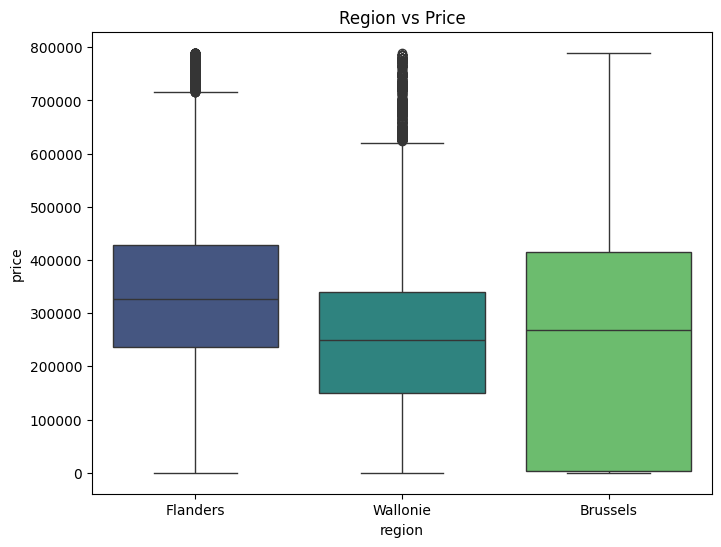

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'region', y = 'price',hue = 'region', data = df, ax=ax, palette='viridis')
plt.title('Region vs Price')

In [ ]:
df.typeofproperty.value_counts()

typeofproperty
2    57596
1    51519
Name: count, dtype: int64

Text(0.5, 1.0, 'Type of Property vs Price')

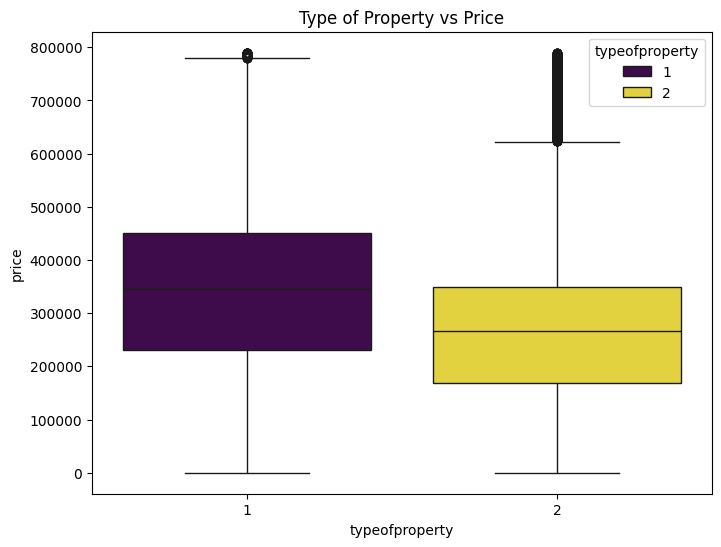

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'typeofproperty', y = 'price',hue = 'typeofproperty', data = df, ax=ax, palette='viridis')
plt.title('Type of Property vs Price')

In [ ]:
df.kitchen.value_counts()

kitchen
INSTALLED             78551
HYPER_EQUIPPED        16817
SEMI_EQUIPPED          7366
NOT_INSTALLED          3593
USA_HYPER_EQUIPPED     1264
USA_INSTALLED          1230
USA_SEMI_EQUIPPED       198
USA_UNINSTALLED          96
Name: count, dtype: int64

In [ ]:
kitchen_stats = df.groupby('kitchen')['price'].mean().reset_index()
kitchen_stats.head()

,kitchen,price
0,HYPER_EQUIPPED,345509.88
1,INSTALLED,297593.73
2,NOT_INSTALLED,263290.84
3,SEMI_EQUIPPED,250718.00
4,USA_HYPER_EQUIPPED,260592.58


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


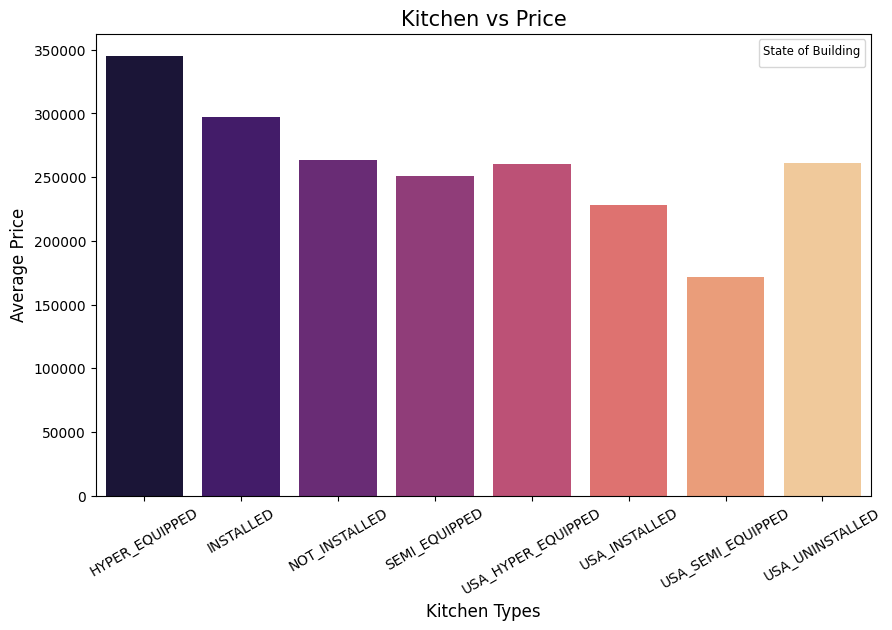

In [ ]:


plt.figure(figsize=(10, 6))
sns.barplot(data = kitchen_stats, y="price", x="kitchen",hue = 'kitchen', palette='magma');
plt.legend(loc='upper right', title='State of Building', fontsize='small', title_fontsize='small')
plt.xticks(rotation=30)
plt.xlabel('Kitchen Types',  fontsize = 12)
plt.ylabel('Average Price', fontsize = 12)
plt.title('Kitchen vs Price',  fontsize = 15)
plt.show()

In [ ]:
df.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
df.postalcode.value_counts()

NameError: name 'df' is not defined

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Prices')
plt.show()

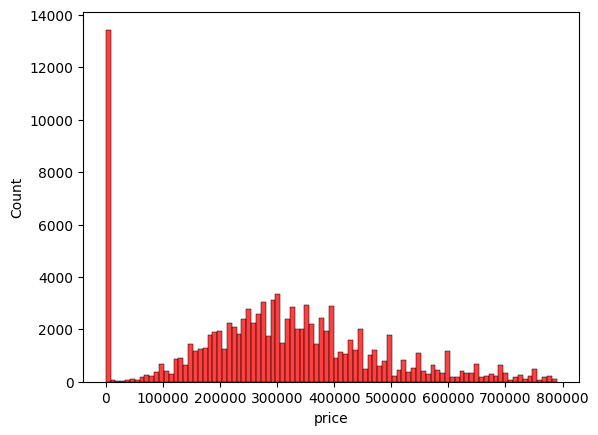

In [ ]:
sns.histplot(df.price, color='r', kde = False)
plt.show()

In [ ]:

sns.boxplot(df.price)

plt.ticklabel_format(style='plain', axis='y')  

plt.show()

In [ ]:
sns.boxplot(x=df['price'])

In [ ]:

sns.boxplot(df.price)

plt.ticklabel_format(style='plain', axis='y')  

plt.show()

In [ ]:

correlation = corr_num['price'].sort_values(ascending = False).to_frame()

correlation

In [ ]:
plt.figure(figsize = (15, 6))
plt.scatter(data = df, x = 'bedroomcount', y = 'price', color = 'crimson', alpha = 0.4)
plt.title("Relationship between Bedroom Count and Price", weight = 'bold', fontsize = 10)
plt.xlabel("Bedroom Count", weight = 'bold')
plt.ylabel("Price", weight = 'bold')
plt.show()

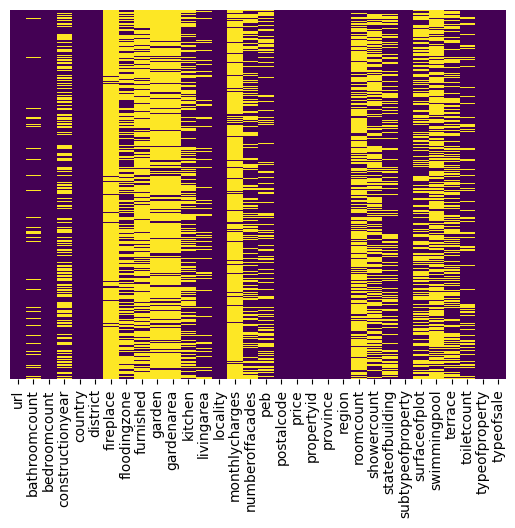

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis');

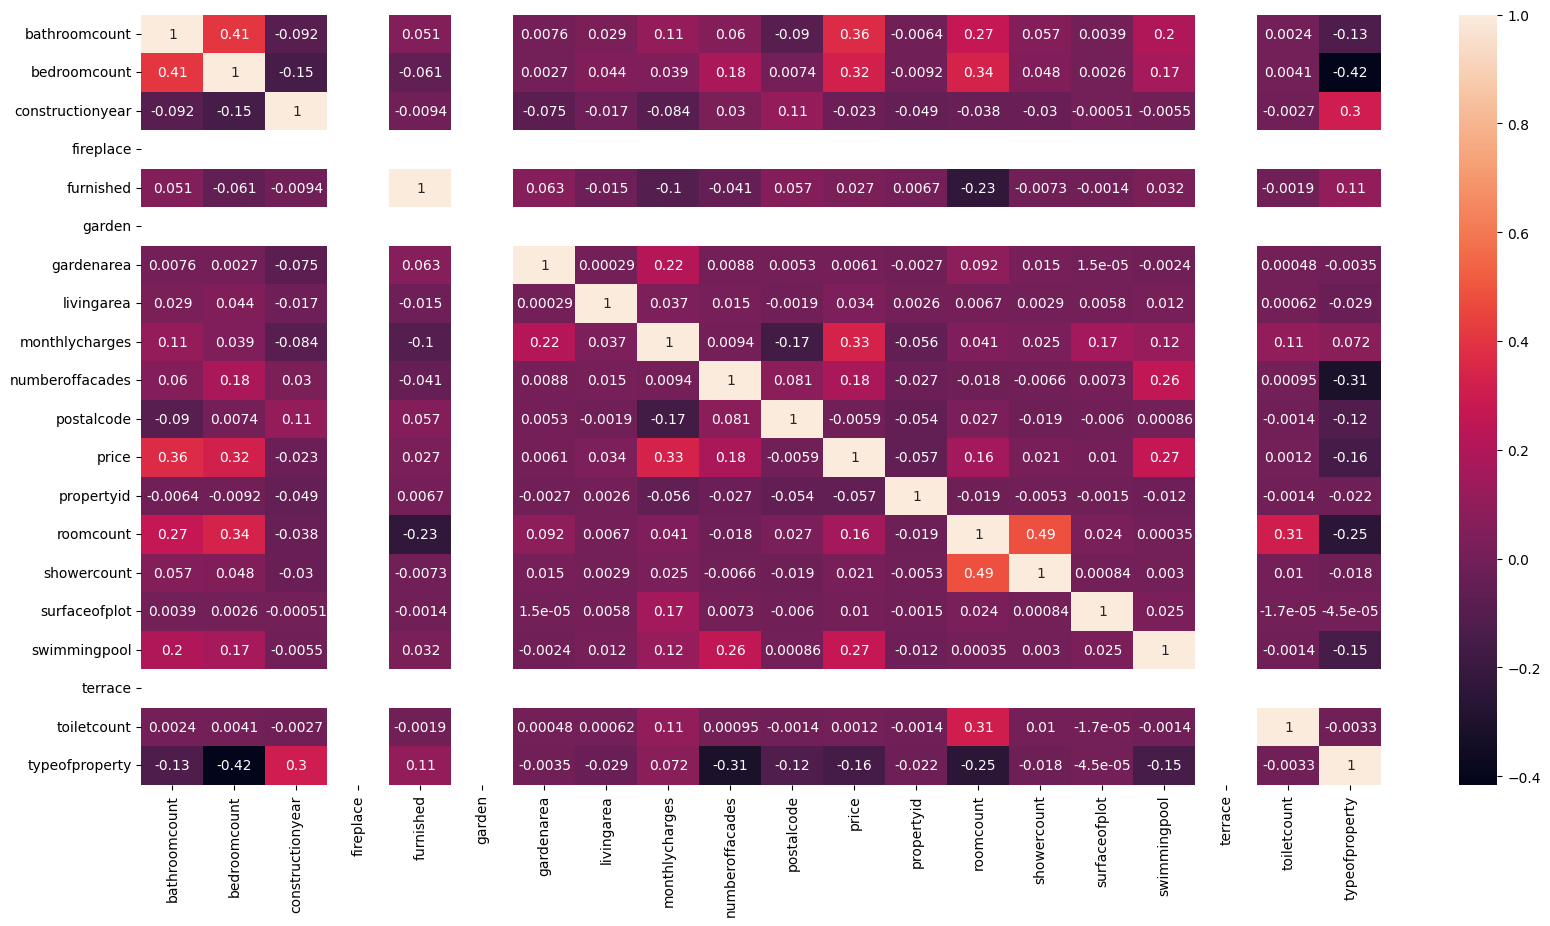

In [ ]:



corr_matrix = df[num_col].corr()

plt.figure(figsize = (20, 10))

sns.heatmap(corr_matrix, annot= True);

#### *Let's see the correlation of numerical features with the target value*

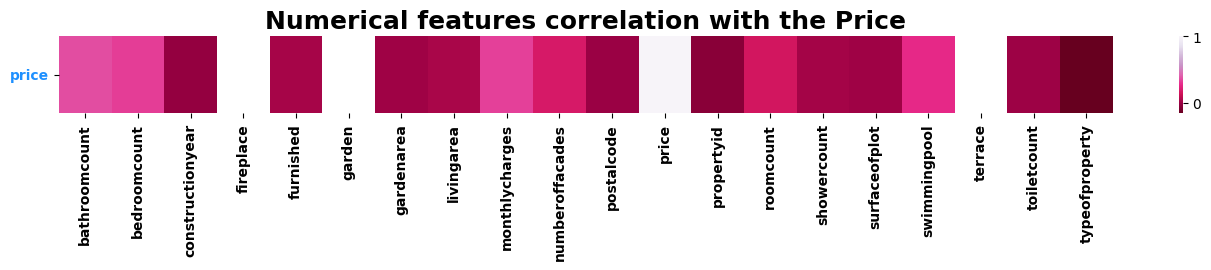

In [ ]:
num = df.select_dtypes(exclude = 'object')
corr_num = num.corr()

f, ax = plt.subplots(figsize = (17, 1))


sns.heatmap(corr_num.sort_values(by = ['price'], ascending = False).head(1), cmap = 'PuRd_r');
plt.title("Numerical features correlation with the Price", weight = 'bold', fontsize = 18)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold', color = 'dodgerblue', rotation = 0)

plt.show()

In [ ]:
correlation = corr_num['price'].sort_values(ascending = False).to_frame()

correlation


,price
price,1.00
bathroomcount,0.36
monthlycharges,0.33
bedroomcount,0.32
swimmingpool,0.27
numberoffacades,0.18
roomcount,0.16
livingarea,0.03
furnished,0.03
showercount,0.02


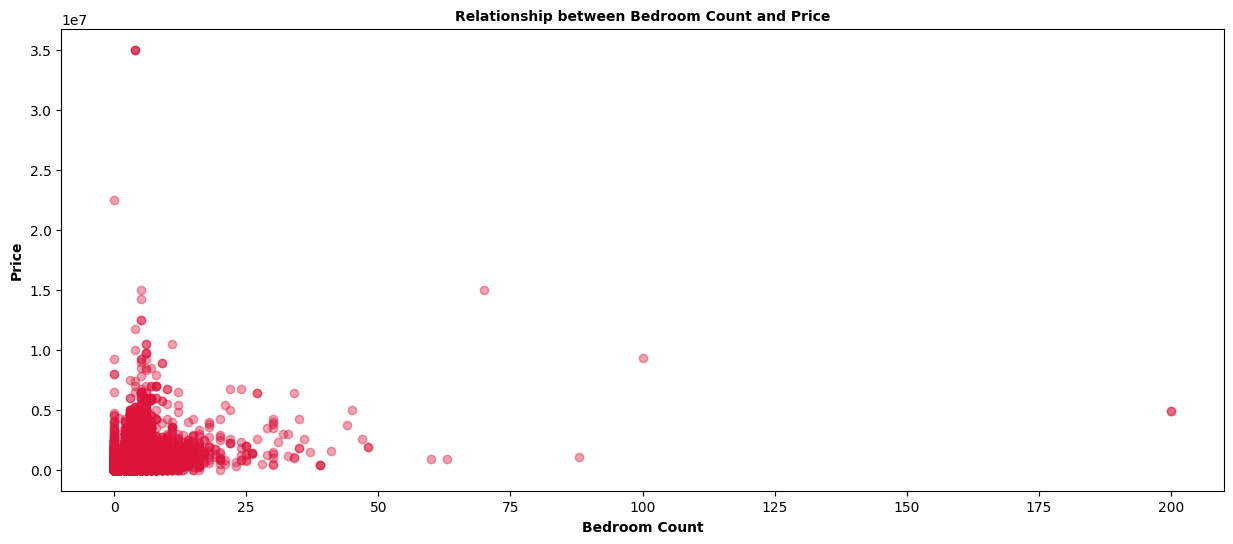

In [ ]:
plt.figure(figsize = (15, 6))
plt.scatter(data = df, x = 'bedroomcount', y = 'price', color = 'crimson', alpha = 0.4)
plt.title("Relationship between Bedroom Count and Price", weight = 'bold', fontsize = 10)
plt.xlabel("Bedroom Count", weight = 'bold')
plt.ylabel("Price", weight = 'bold')
plt.show()

# **CHARTS**

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.histplot(df['price'], kde = False, ax = ax)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.dtypes

# **Numeric Feature**

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
correlation = df.select_dtypes(include = ['float64', 'int64', 'int32']).corr()
sns.heatmap(correlation, ax = ax, vmax = 1, square = True, cmap='Blues')
plt.title('Numeric Feature Heatmap')

# **Correlation**

In [ ]:

num = df.select_dtypes(exclude = 'object')
corr_num = num.corr()


correlation = corr_num['price'].sort_values(ascending = False).to_frame()

correlation


# **PROVINCES vs AVG PRICES** 

In [ ]:
avg_price_province = df.groupby('province')['price'].mean().reset_index()
avg_price_province.head()

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data = avg_price_province, y ="price", x ="province", hue = 'province', palette='magma')
plt.xticks(rotation=30)
plt.xlabel('Provinces',  fontsize = 12)
plt.ylabel('Average Price',  fontsize = 12)
plt.title('Average Price by Provinces',  fontsize = 15)
plt.show()

# **DECADES vs AVG PRICES** 

In [ ]:
def year_to_decade(year):
    return (year // 10) * 10

df['decade'] = df['constructionyear'].apply(year_to_decade)

In [ ]:
decades = df.groupby('decade')['price'].mean().reset_index()

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=decades, x='decade', y='price', marker='o', color='b')

plt.title('Average SalePrice by Construction Year', fontsize=16)
plt.xlabel('Construction Year', fontsize=14)
plt.ylabel('Average Sale Price', fontsize=14)
plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  

plt.show()

In [ ]:
df['decade'].value_counts().sort_index().reset_index()

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='decade', y='price', marker='o', color='b')

plt.title('Average SalePrice by Construction Year', fontsize=16)
plt.xlabel('Construction Year', fontsize=14)
plt.ylabel('Average Sale Price', fontsize=14)
plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  

plt.show()

# **Bedroom Count VS Price**

In [ ]:
bedr_mean = df.groupby('bedroomcount')['price'].mean().reset_index()
bedr_mean

In [ ]:


fig,ax = plt.subplots(figsize=(8,6))
sns.regplot(x = 'bedroomcount', y='price' , data=bedr_mean, ax=ax)

In [ ]:
liv_area = df.groupby('livingarea')['price'].mean().reset_index()
liv_area.head()

In [ ]:
liv_area = df.groupby('livingarea')['price'].mean().reset_index()

fig,ax = plt.subplots(figsize=(8,6))
sns.regplot(x = 'livingarea', y='price', data=liv_area, ax=ax);

In [ ]:
state = df.groupby('stateofbuilding')['price'].mean().reset_index()
state.head()

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data = state, y="price", x="stateofbuilding",hue = 'stateofbuilding', palette='magma');
plt.legend(loc='upper right', title='State of Building', fontsize='small', title_fontsize='small')
# plt.xticks(rotation=30)
plt.xlabel('State of Building',  fontsize = 12)
plt.ylabel('Average Price', fontsize = 12)
plt.title('Average Price by State of Building',  fontsize = 15)
plt.show()

In [ ]:
fig, ax = plt.subplots(3, 2, figsize = (10, 9))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)




ax[2,1].scatter(avg_price_province['province'], avg_price_province['price'])
ax[2,1].set_title('PROVINCES vs Price', fontsize = 10)
ax[2,1].set_xticklabels(avg_price_province['province'], rotation = 70, fontsize = 10)

ax[0,0].scatter(decades['decade'], decades['price'])
ax[0,0].set_title('Decades vs Price')
ax[0,1].scatter(bedr_mean['bedroomcount'], bedr_mean['price'])
ax[0,1].set_title('Bedroom Countvs Price')


ax[1,0].scatter(state['stateofbuilding'], state['price'])
ax[1,0].set_title('State of Building vs Price')
plt.tight_layout()


# ax[1,1].scatter(df['bathroomcount'], property_prices)
# ax[1,1].set_title('Bathroom Count vs Price')
# ax[2,0].scatter(df['numberoffacades'], property_prices)
# ax[2,0].set_title('Number of Facades vs Price')
# ax[2,1].scatter(df['roomcount'], property_prices)
# ax[2,1].set_title('Room Count vs Price')
# plt.tight_layout()



In [ ]:
df.region.value_counts()

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'region', y = 'price',hue = 'region', data = df, ax=ax, palette='viridis')
plt.title('Region vs Price')

In [ ]:
df.typeofproperty.value_counts()

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'typeofproperty', y = 'price',hue = 'typeofproperty', data = df, ax=ax, palette='viridis')
plt.title('Type of Property vs Price')

In [ ]:
df.kitchen.value_counts()

In [ ]:
kitchen_stats = df.groupby('kitchen')['price'].mean().reset_index()
kitchen_stats.head()

In [ ]:


plt.figure(figsize=(10, 6))
sns.barplot(data = kitchen_stats, y="price", x="kitchen",hue = 'kitchen', palette='magma');
plt.legend(loc='upper right', title='State of Building', fontsize='small', title_fontsize='small')
plt.xticks(rotation=30)
plt.xlabel('Kitchen Types',  fontsize = 12)
plt.ylabel('Average Price', fontsize = 12)
plt.title('Kitchen vs Price',  fontsize = 15)
plt.show()

In [ ]:
df.postalcode.value_counts()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Prices')
plt.show()

In [ ]:
sns.histplot(df.price, color='r', kde = False)
plt.show()

In [ ]:

sns.boxplot(df.price)

plt.ticklabel_format(style='plain', axis='y')  

plt.show()

In [ ]:
sns.boxplot(x=df['price'])

In [ ]:

sns.boxplot(df.price)

plt.ticklabel_format(style='plain', axis='y')  

plt.show()

In [ ]:

correlation = corr_num['price'].sort_values(ascending = False).to_frame()

correlation

In [ ]:
plt.figure(figsize = (15, 6))
plt.scatter(data = df, x = 'bedroomcount', y = 'price', color = 'crimson', alpha = 0.4)
plt.title("Relationship between Bedroom Count and Price", weight = 'bold', fontsize = 10)
plt.xlabel("Bedroom Count", weight = 'bold')
plt.ylabel("Price", weight = 'bold')
plt.show()

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis');

In [ ]:



corr_matrix = df[num_col].corr()

plt.figure(figsize = (20, 10))

sns.heatmap(corr_matrix, annot= True);

#### *Let's see the correlation of numerical features with the target value*

In [ ]:
num = df.select_dtypes(exclude = 'object')
corr_num = num.corr()

f, ax = plt.subplots(figsize = (17, 1))


sns.heatmap(corr_num.sort_values(by = ['price'], ascending = False).head(1), cmap = 'PuRd_r');
plt.title("Numerical features correlation with the Price", weight = 'bold', fontsize = 18)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold', color = 'dodgerblue', rotation = 0)

plt.show()

In [ ]:
correlation = corr_num['price'].sort_values(ascending = False).to_frame()

correlation


In [ ]:
plt.figure(figsize = (15, 6))
plt.scatter(data = df, x = 'bedroomcount', y = 'price', color = 'crimson', alpha = 0.4)
plt.title("Relationship between Bedroom Count and Price", weight = 'bold', fontsize = 10)
plt.xlabel("Bedroom Count", weight = 'bold')
plt.ylabel("Price", weight = 'bold')
plt.show()